# RAIL

In [50]:
from rail import Controls, Impact, Likelihood, Risks, ThreatEvents, ThreatSources, Tree, Vulnerabilities

In [51]:
test_system = Tree(name="Test System")
test_system.add_child(name="Test Child")
test_system["Test Child"].add_child(name="Test Grandchild")
test_system.to_print()

/Test System
/Test System/Test Child
/Test System/Test Child/Test Grandchild


In [52]:
threat_sources = ThreatSources()
threat_sources.new(name="Threat Source 1")
threat_sources

{'Threat Source 1': {'name': 'Threat Source 1'}}

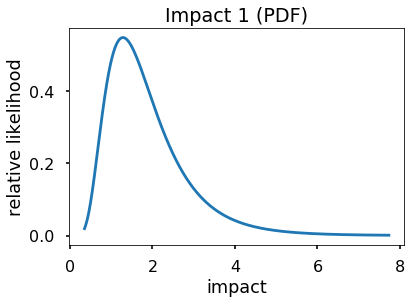

In [53]:
impact_one = Impact(name="Impact 1", mu=.5, sigma=.5)
impact_one.plot()

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([1.72032e+00, 0.00000e+00, 8.31600e-01, 0.00000e+00, 0.00000e+00,
        2.07760e-01, 0.00000e+00, 0.00000e+00, 3.64000e-02, 0.00000e+00,
        0.00000e+00, 3.36000e-03, 0.00000e+00, 5.60000e-04]),
 array([0.        , 0.35714286, 0.71428571, 1.07142857, 1.42857143,
        1.78571429, 2.14285714, 2.5       , 2.85714286, 3.21428571,
        3.57142857, 3.92857143, 4.28571429, 4.64285714, 5.        ]),
 <a list of 14 Patch objects>)

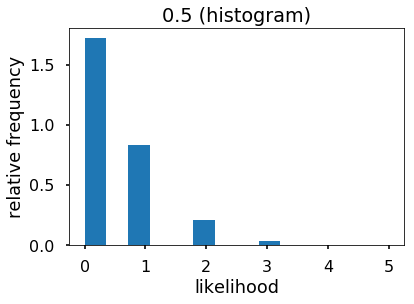

In [54]:
test_likelihood = Likelihood(lam=.5)
test_likelihood.plot()

In [55]:
controls = Controls()
controls.new('Control 1', cost=100000, reduction=.01)
controls

{'Control 1': {'name': 'Control 1', 'cost': 100000, 'reduction': 0.01, 'implemented': True}}

In [56]:
threat_events = ThreatEvents()
vulnerabilities = Vulnerabilities()
risks = Risks()

risks.new(
    vulnerabilities.new(
        threat_events.new(name="Threat Event 1", threat_source=threat_sources["Threat Source 1"]),
        test_system["Test Child"],
    [controls['Control 1']]),
    test_likelihood,
    impact_one)

risks.dataframe

,Threat Source,Threat Event,System,Controls,Impact,Impact (mean),Likelihood (mean)
0,Threat Source 1,Threat Event 1,/Test System/Test Child,[Control 1],Impact 1,1.87,0.50


(array([1.00e+00, 5.25e-03, 5.25e-03, ..., 1.00e-05, 1.00e-05, 1.00e-05]),
 array([0.00000000e+00, 8.49821044e-04, 1.69964209e-03, ...,
        8.49651079e+00, 8.49736062e+00, 8.49821044e+00]),
 <a list of 1 Patch objects>)

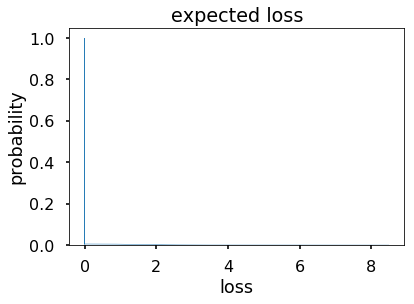

In [57]:
risks.plot()

In [58]:
risks.set_optimum_controls(controls)

,cost,implemented,reduction
name,,,
Control 1,100000,False,0.01


/usr/local/lib/python3.7/site-packages/matplotlib/axes/_base.py:3116: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


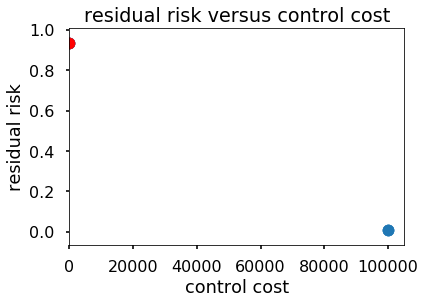

In [59]:
from matplotlib import pyplot as plt

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
risks.plot_risk_cost_matrix(controls, axes)